In [10]:
import pandas as pd

# Ruta del archivo CSV
file_path = r"C:\Users\MAYRA ROCIO\Downloads\Tesla\Tesla.csv"

# Cargar los datos
df = pd.read_csv(file_path)

# Mostrar las primeras filas para inspección
print("Primeras filas del DataFrame:")
print(df.head())

# Verificar las columnas del DataFrame
print("\nColumnas del DataFrame:")
print(df.columns)

# Convertir la columna 'Date' a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Eliminar filas con valores nulos si es necesario
df.dropna(inplace=True)

# Verificar el tipo de la columna 'Date' después de la conversión
print("\nTipo de la columna 'Date':", df['Date'].dtype)

# Verificar las primeras filas después de la limpieza
print("\nPrimeras filas después de la limpieza:")
print(df.head())


Primeras filas del DataFrame:
   Unnamed: 0     Date      Open      High       Low     Close  Adj Close  \
0           0  6/29/10  1.266667  1.666667  1.169333  1.592667   1.592667   
1           1  6/30/10  1.719333  2.028000  1.553333  1.588667   1.588667   
2           2   7/1/10  1.666667  1.728000  1.351333  1.464000   1.464000   
3           3   7/2/10  1.533333  1.540000  1.247333  1.280000   1.280000   
4           4   7/6/10  1.333333  1.333333  1.055333  1.074000   1.074000   

      Volume  
0  281494500  
1  257806500  
2  123282000  
3   77097000  
4  103003500  

Columnas del DataFrame:
Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

Tipo de la columna 'Date': datetime64[ns]

Primeras filas después de la limpieza:
   Unnamed: 0       Date      Open      High       Low     Close  Adj Close  \
0           0 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667   
1           1 2010-06-30  1.719333  2

C:\Users\MAYRA ROCIO\AppData\Local\Temp\ipykernel_15888\807379527.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])



Estadísticas descriptivas:
        Unnamed: 0                           Date         Open         High  \
count  3637.000000                           3637  3637.000000  3637.000000   
mean   1818.000000  2017-09-17 12:05:20.703876864    80.080574    81.832710   
min       0.000000            2010-06-29 00:00:00     1.076000     1.108667   
25%     909.000000            2014-02-07 00:00:00    12.046667    12.320000   
50%    1818.000000            2017-09-18 00:00:00    17.833332    18.080000   
75%    2727.000000            2021-04-29 00:00:00   176.070007   179.770004   
max    3636.000000            2024-12-09 00:00:00   411.470001   414.496674   
std    1050.055792                            NaN   105.466131   107.807170   

               Low        Close    Adj Close        Volume  
count  3637.000000  3637.000000  3637.000000  3.637000e+03  
mean     78.219276    80.067952    80.067952  9.667330e+07  
min       0.998667     1.053333     1.053333  1.777500e+06  
25%      11.7466

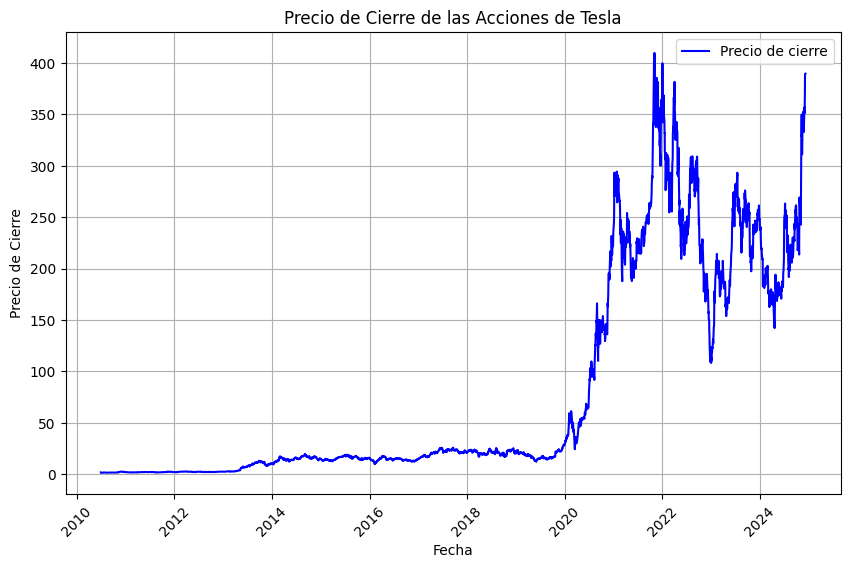

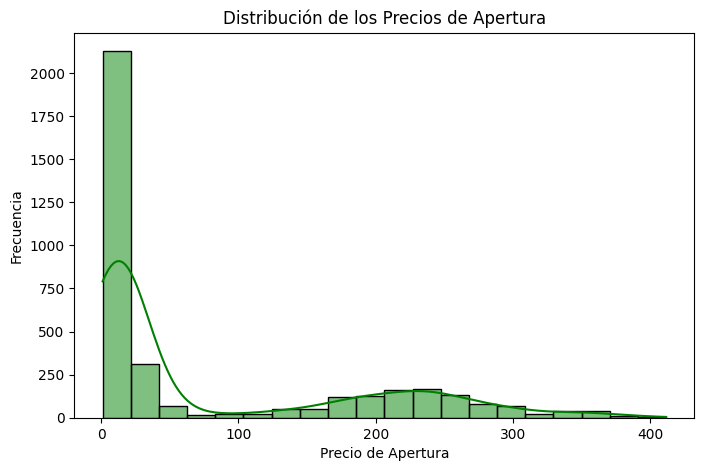

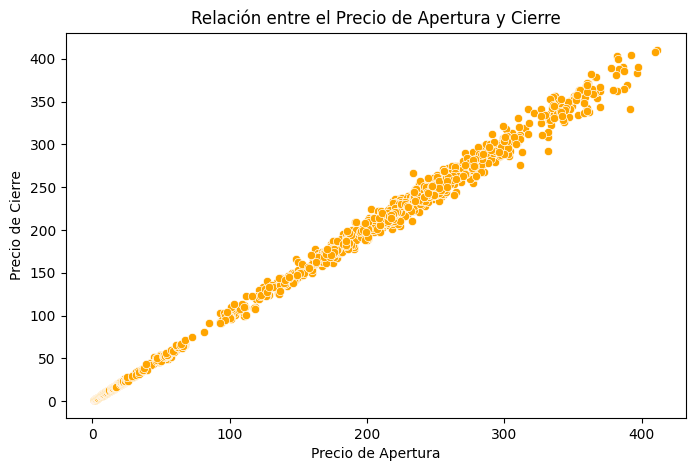

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mostrar estadísticas descriptivas del DataFrame
print("\nEstadísticas descriptivas:")
print(df.describe())

# Visualización de la tendencia de precios de las acciones de Tesla a lo largo del tiempo
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Close'], label='Precio de cierre', color='blue')
plt.title('Precio de Cierre de las Acciones de Tesla')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Distribución de los precios de apertura (Open)
plt.figure(figsize=(8,5))
sns.histplot(df['Open'], kde=True, color='green')
plt.title('Distribución de los Precios de Apertura')
plt.xlabel('Precio de Apertura')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre las columnas 'Open' y 'Close' (precios de apertura y cierre)
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Open'], y=df['Close'], color='orange')
plt.title('Relación entre el Precio de Apertura y Cierre')
plt.xlabel('Precio de Apertura')
plt.ylabel('Precio de Cierre')
plt.show()



Error cuadrático medio (MSE): 2.3513211534241587
Raíz del error cuadrático medio (RMSE): 1.5334018238622773


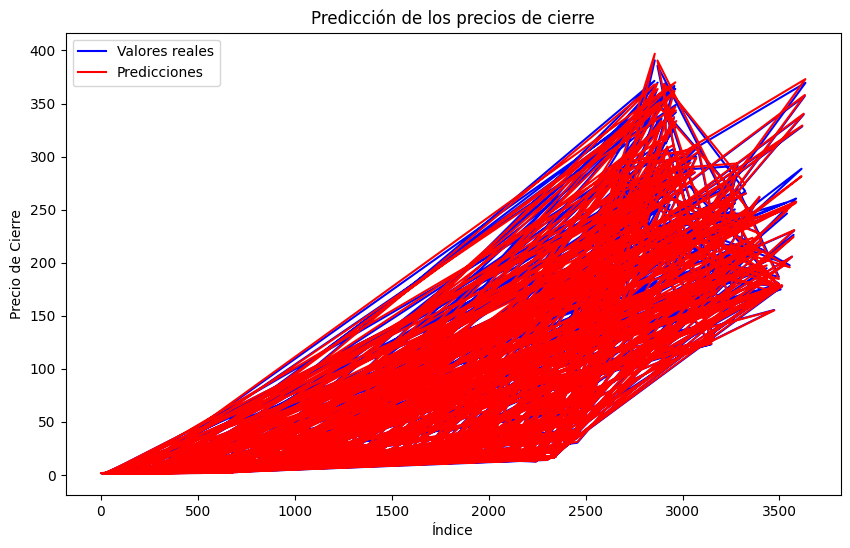

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Seleccionar las características (features) y la variable objetivo (target)
X = df[['Open', 'High', 'Low', 'Volume']]  # Usamos 'Open', 'High', 'Low' y 'Volume' como características
y = df['Close']  # Variable objetivo: 'Close' (precio de cierre)

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print("\nError cuadrático medio (MSE):", mse)
print("Raíz del error cuadrático medio (RMSE):", rmse)

# Visualizar las predicciones vs. los valores reales
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Valores reales', color='blue')
plt.plot(y_test.index, y_pred, label='Predicciones', color='red')
plt.title('Predicción de los precios de cierre')
plt.xlabel('Índice')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()


In [15]:
# Guardar el DataFrame procesado en un nuevo archivo CSV
df.to_csv(r'C:\Users\MAYRA ROCIO\Downloads\Tesla\Tesla_preprocessed.csv', index=False)

# Guardar las predicciones en un archivo CSV
predictions = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})
predictions.to_csv(r'C:\Users\MAYRA ROCIO\Downloads\Tesla\predicciones.csv', index=False)

print("\nDatos preprocesados y predicciones guardados con éxito.")



Datos preprocesados y predicciones guardados con éxito.


In [17]:
import pandas as pd

# Ruta del archivo CSV
file_path = r"C:\Users\MAYRA ROCIO\Downloads\Tesla\Tesla.csv"

# Cargar los datos
df = pd.read_csv(file_path)

# Mostrar las primeras filas para inspección
data_info = df.head()

# Convertir la columna 'Date' a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Eliminar filas con valores nulos si es necesario
df.dropna(inplace=True)

# Mostrar el resumen del DataFrame después de la limpieza
cleaned_data_info = df.head()

# Mostrar las columnas y el tipo de dato de la columna 'Date'
column_info = df.dtypes

# Estadísticas descriptivas del DataFrame
statistics = df.describe()

# Mostrar las correlaciones entre las columnas
correlation_matrix = df.corr()

# Resultados del paso de preprocesamiento
print("Datos originales (primeras filas):")
print(data_info)

print("\nDatos después de la limpieza (primeras filas):")
print(cleaned_data_info)

print("\nTipos de datos del DataFrame:")
print(column_info)

print("\nEstadísticas descriptivas:")
print(statistics)

print("\nCorrelación entre las columnas:")
print(correlation_matrix)


Datos originales (primeras filas):
   Unnamed: 0     Date      Open      High       Low     Close  Adj Close  \
0           0  6/29/10  1.266667  1.666667  1.169333  1.592667   1.592667   
1           1  6/30/10  1.719333  2.028000  1.553333  1.588667   1.588667   
2           2   7/1/10  1.666667  1.728000  1.351333  1.464000   1.464000   
3           3   7/2/10  1.533333  1.540000  1.247333  1.280000   1.280000   
4           4   7/6/10  1.333333  1.333333  1.055333  1.074000   1.074000   

      Volume  
0  281494500  
1  257806500  
2  123282000  
3   77097000  
4  103003500  

Datos después de la limpieza (primeras filas):
   Unnamed: 0       Date      Open      High       Low     Close  Adj Close  \
0           0 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667   
1           1 2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667   
2           2 2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000   
3           3 2010-07-02  1.533333  1.540000  1.

C:\Users\MAYRA ROCIO\AppData\Local\Temp\ipykernel_15888\2615584166.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Seleccionar las características (features) y la variable objetivo (target)
X = df[['Open', 'High', 'Low', 'Volume']]  # Usamos 'Open', 'High', 'Low' y 'Volume' como características
y = df['Close']  # Variable objetivo: 'Close' (precio de cierre)

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

# Crear una tabla con los valores reales y las predicciones
predictions_df = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})

# Resumen final
summary = {
    'Paso': ['Carga de Datos', 'Estadísticas Descriptivas', 'Correlación', 'Modelo (MSE)', 'Modelo (RMSE)', 'Predicciones'],
    'Resultado': [
        data_info.head(),  # Datos originales (primeras filas)
        statistics,         # Estadísticas descriptivas
        correlation_matrix, # Correlación
        mse,                # MSE
        rmse,               # RMSE
        predictions_df.head() # Predicciones
    ]
}

summary_df = pd.DataFrame(summary)

# Mostrar la tabla resumen
print("\nResumen del Proyecto:")
print(summary_df)



Resumen del Proyecto:
                        Paso  \
0             Carga de Datos   
1  Estadísticas Descriptivas   
2                Correlación   
3               Modelo (MSE)   
4              Modelo (RMSE)   
5               Predicciones   

                                           Resultado  
0     Unnamed: 0     Date      Open      High    ...  
1          Unnamed: 0                           D...  
2              Unnamed: 0      Date      Open    ...  
3                                           2.351321  
4                                           1.533402  
5              Real  Predicción
2266   15.144667 ...  


In [21]:
# Resumen final con límite de filas y columnas para las tablas grandes
summary = {
    'Paso': ['Carga de Datos', 'Estadísticas Descriptivas', 'Correlación', 'Modelo (MSE)', 'Modelo (RMSE)', 'Predicciones'],
    'Resultado': [
        data_info.head().to_string(),  # Limitar a las primeras filas para mostrar datos
        statistics.head().to_string(), # Limitar a las primeras filas de estadísticas
        correlation_matrix.head().to_string(), # Limitar la correlación
        mse,                           # Mostrar el MSE
        rmse,                          # Mostrar el RMSE
        predictions_df.head().to_string() # Limitar a las primeras filas de predicciones
    ]
}

summary_df = pd.DataFrame(summary)

# Mostrar la tabla resumen de forma legible
print("\nResumen del Proyecto:")
print(summary_df)




Resumen del Proyecto:
                        Paso  \
0             Carga de Datos   
1  Estadísticas Descriptivas   
2                Correlación   
3               Modelo (MSE)   
4              Modelo (RMSE)   
5               Predicciones   

                                           Resultado  
0     Unnamed: 0     Date      Open      High    ...  
1         Unnamed: 0                           Da...  
2              Unnamed: 0      Date      Open    ...  
3                                           2.351321  
4                                           1.533402  
5              Real  Predicción\n2266   15.144667...  
